<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<hr>

# Copernicus Sentinel-5P TROPOMI - Carbon Monoxide - Level 2

### About

The Copernicus [Sentinel-5 Ultraviolet Visible Near-Infrared Shortwave (UVNS) spectrometer](https://sentinels.copernicus.eu/web/sentinel/missions/sentinel-5) enables the measurement of trace gases which will improve air quality forecasts produced by the Copernicus Atmosphere Monitoring service.

This notebook provides you an introduction to data from [Sentinel-5P](https://sentinels.copernicus.eu/web/sentinel/missions/sentinel-5p), the precursor instrument and proxy for data from [Sentinel-5](https://www.eumetsat.int/sentinel-5). 

The data product of interest is the total column of carbon monoxide sensed by Sentinel-5P TROPOMI. Carbon monoxide is a good trace gas for monitoring and tracking smoke from wildfires. 

The events featured in this notebook are the wildfires in GIronde, France in August 2022. 

### Basic Facts

> **Spatial resolution**: `Up to 5.5* km x 3.5 km` (5.5 km in the satellite flight direction and 3.5 km in the perpendicular direction at nadir) <br>
> **Spatial coverage**: `Global` <br>
> **Revisit time**:  `less than one day` <br>
> **Data availability**: `since April 2018`


### How to access the data

Sentinel-5P Pre-Ops data are disseminated in the `netCDF` format and can be downloaded via the [Sentinel-5P Pre-Operations Data Hub](https://s5phub.copernicus.eu/dhus/#/home). You can login with the following credentials:
* **Username**: `s5pguest`
* **Password**: `s5pguest`

### Module outline:
* [1 - Load and browse Sentinel-5P TROPOMI Carbon Monoxide Level 2 data](#load_s5p)
* [2 - Create a geographical subset around GIronde, France](#geographical_subset_med)
* [3 - Visualise Sentinel-5P TROPOMI Carbon Monoxide Level 2 data](#vis_s5p)

<hr>

##### Load required libraries

In [1]:
import os
import xarray as xr
import numpy as np
import netCDF4 as nc

# Python libraries for visualization
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
import logging
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
logging.basicConfig(level=logging.ERROR)

##### Load helper functions

In [2]:
%run ./functions.ipynb

<hr>

## <a id="load_s5p"></a>1. Load and browse Sentinel-5P TROPOMI Carbon Monoxide Level 2 data

A Sentinel-5P TROPOMI Carbon Monoxide Level 2 file is organised in two groups: `PRODUCT` and `METADATA`. The `PRODUCT` group stores the main data fields of the product, including `latitude`, `longitude` and the variable itself. The `METADATA` group provides additional metadata items.

Sentinel-5P TROPOMI variables have the following dimensions:
* `scanline`: the number of measurements in the granule / along-track dimension index
* `ground_pixel`: the number of spectra in a measurement / across-track dimension index
* `time`: time reference for the data
* `corner`: pixel corner index
* `layer`: this dimension indicates the vertical grid of profile variables

Sentinel-5P TROPOMI data is disseminated in `netCDF`. You can load a netCDF file with the `open_dataset()` function of the xarray library. In order to load the variable as part of a Sentinel-5P data files, you have to specify the following keyword arguments: 
* `group='PRODUCT'`: to load the `PRODUCT` group. 

Let us load a Sentinel-5P TROPOMI data file as `xarray.Dataset` from 10 August 2022 and inspect the data structure:

In [3]:
s5p = xr.open_dataset('../eodata/portugal_fire_workshop/sentinel-5p/co/S5P_OFFL_L2__CO_____20220810T120348_20220810T134517_25000_03_020400_20220814T074251.nc', group='PRODUCT')
s5p

<xarray.Dataset>
Dimensions:                                (scanline: 4173, ground_pixel: 215, time: 1, corner: 4, layer: 50)
Coordinates:
  * scanline                               (scanline) float64 0.0 ... 4.172e+03
  * ground_pixel                           (ground_pixel) float64 0.0 ... 214.0
  * time                                   (time) datetime64[ns] 2022-08-10
  * corner                                 (corner) float64 0.0 1.0 2.0 3.0
  * layer                                  (layer) float32 4.95e+04 ... 500.0
    latitude                               (time, scanline, ground_pixel) float32 ...
    longitude                              (time, scanline, ground_pixel) float32 ...
Data variables:
    delta_time                             (time, scanline) datetime64[ns] ...
    time_utc                               (time, scanline) object ...
    qa_value                               (time, scanline, ground_pixel) float32 ...
    carbonmonoxide_total_column            (time, scanline, ground_pixel) float32 ...
    carbonmonoxide_total_column_precision  (time, scanline, ground_pixel) float32 ...
    carbonmonoxide_total_column_corrected  (time, scanline, ground_pixel) float32 ...

You see that the loaded data object contains of five dimensions and five data variables:
* **Dimensions**:
  * `scanline` 
  * `ground_pixel`
  * `time`
  * `corner`
  * `layer`


* **Data variables**:
  * `delta_time`: the offset of individual measurements within the granule, given in milliseconds
  * `time_utc`: valid time stamp of the data
  * `ga_value`: quality descriptor, varying between 0 (nodata) and 1 (full quality data).
  * `carbonmonoxide_total_column`: Vertically integrated CO column density
  * `carbonmonoxide_total_column_precision`: Standard error of the vertically integrate CO column

You can specify one variable of interest by putting the name of the variable into square brackets `[]` and get more detailed information about the variable. E.g. `carbonmonoxide_total_column` is the atmosphere mole content of carbon monoxide, has the unit `mol per m-2`, and has three dimensions, `time`, `scanline` and `groundpixel` respectively.

In [4]:
s5p_co = s5p['carbonmonoxide_total_column']
s5p_co

<xarray.DataArray 'carbonmonoxide_total_column' (time: 1, scanline: 4173, ground_pixel: 215)>
[897195 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.171e+03 4.172e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
  * time          (time) datetime64[ns] 2022-08-10
    latitude      (time, scanline, ground_pixel) float32 ...
    longitude     (time, scanline, ground_pixel) float32 ...
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             Vertically integra...
    ancillary_variables:                                   carbonmonoxide_tot...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

You can do this for the available variables, but also for the dimensions latitude and longitude.

In [5]:
print('Latitude')
print(s5p_co.latitude)

print('Longitude')
print(s5p_co.longitude)

Latitude
<xarray.DataArray 'latitude' (time: 1, scanline: 4173, ground_pixel: 215)>
[897195 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.171e+03 4.172e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
  * time          (time) datetime64[ns] 2022-08-10
    latitude      (time, scanline, ground_pixel) float32 ...
    longitude     (time, scanline, ground_pixel) float32 ...
Attributes:
    long_name:      pixel center latitude
    units:          degrees_north
    standard_name:  latitude
    valid_min:      -90.0
    valid_max:      90.0
    bounds:         /PRODUCT/SUPPORT_DATA/GEOLOCATIONS/latitude_bounds
Longitude
<xarray.DataArray 'longitude' (time: 1, scanline: 4173, ground_pixel: 215)>
[897195 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.171e+03 4.172e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
  * time          

<br>

You can retrieve the array values of the variable with squared brackets: `[:,:,:]`. One single time step can be selected by specifying one value of the time dimension, e.g. `[0,:,:]`.

In [6]:
s5p_co_0810 = s5p_co[0,:,:]
s5p_co_0810

<xarray.DataArray 'carbonmonoxide_total_column' (scanline: 4173, ground_pixel: 215)>
[897195 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.171e+03 4.172e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
    time          datetime64[ns] 2022-08-10
    latitude      (scanline, ground_pixel) float32 ...
    longitude     (scanline, ground_pixel) float32 ...
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             Vertically integra...
    ancillary_variables:                                   carbonmonoxide_tot...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

The attributes of the `xarray.DataArray` hold the entry `multiplication_factor_to_convert_to_molecules_percm2`, which is a conversion factor that has to be applied to convert the data from `mol per m`<sup>`2`</sup> to `molecules per cm`<sup>`2`</sup>.


In [7]:
conversion_factor = s5p_co.multiplication_factor_to_convert_to_molecules_percm2
conversion_factor

6.022141e+19

Additionally, you can save the attribute `longname`, which you can make use of when visualizing the data.

In [8]:
longname = s5p_co.long_name
longname

'Vertically integrated CO column'

## <a id='geographical_subset_med'></a>2. Create  a geographical subset around GIronde, France

You can zoom into a region by specifying a `bounding box` of interest. Let us set the extent to GIronde, France with the following bounding box information:

In [9]:
latmin = 40
latmax = 48
lonmin = -6
lonmax = 2

You can use the function [generate_geographical_subset](../functions.ipynb#generate_geographical_subset) to subset an `xarray.DataArray` based on a given bounding box.

In [10]:
s5p_co_subset = generate_geographical_subset(xarray=s5p_co_0810, 
                                             latmin=latmin, 
                                             latmax=latmax, 
                                             lonmin=lonmin, 
                                             lonmax=lonmax)
s5p_co_subset

<xarray.DataArray 'carbonmonoxide_total_column' (scanline: 184, ground_pixel: 107)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * scanline      (scanline) float64 2.505e+03 2.506e+03 ... 2.687e+03 2.688e+03
  * ground_pixel  (ground_pixel) float64 47.0 48.0 49.0 ... 151.0 152.0 153.0
    time          datetime64[ns] 2022-08-10
    latitude      (scanline, ground_pixel) float32 38.25 38.29 ... 49.24 49.25
    longitude     (scanline, ground_pixel) float32 -5.18 -5.071 ... 1.401 1.521
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             Vertically integra...
    ancillary_variables:                                   carbonmonoxide_tot...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

<br>

## <a id="vis_s5p"></a>3. Visualise Sentinel-5P TROPOMI Carbon Monoxide Level 2 data

You can plot data arrays of type `numpy` with matplotlib's `pcolormesh` function. In combination with the library [cartopy](https://scitools.org.uk/cartopy/docs/latest/), you can produce high-quality maps. 

In order to make it easier to visualize the Carbon Monoxide values, we apply the conversion factor to the `xarray.DataArray`. This converts the Carbon Monoxide values from *mol per m<sup>2</sup>* to *molecules per cm<sup>2</sup>*.

In [11]:
s5p_co_converted = s5p_co_subset*conversion_factor
s5p_co_converted

<xarray.DataArray 'carbonmonoxide_total_column' (scanline: 184, ground_pixel: 107)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * scanline      (scanline) float64 2.505e+03 2.506e+03 ... 2.687e+03 2.688e+03
  * ground_pixel  (ground_pixel) float64 47.0 48.0 49.0 ... 151.0 152.0 153.0
    time          datetime64[ns] 2022-08-10
    latitude      (scanline, ground_pixel) float32 38.25 38.29 ... 49.24 49.25
    longitude     (scanline, ground_pixel) float32 -5.18 -5.071 ... 1.401 1.521

For visualization, you can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) to visualize the data. The following keyword arguments have to be defined:
* `data_array`
* `longitude`
* `latitude`
* `projection`
* `color palette`
* `unit`
* `long_name`
* `vmin`, 
* `vmax`
* `extent (lonmin, lonmax, latmin, latmax)`
* `set_global`

Now, let us apply the [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) function and visualize the vertically integrated carbon monoxide column recorded the Sentinel-5P satellite on 10 August 2022.

Note: Multiplying the DataArray values with 1e<sup>-18</sup> improves the readibility of the map legend.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Vertically integrated CO column 2022-08-10'}>)

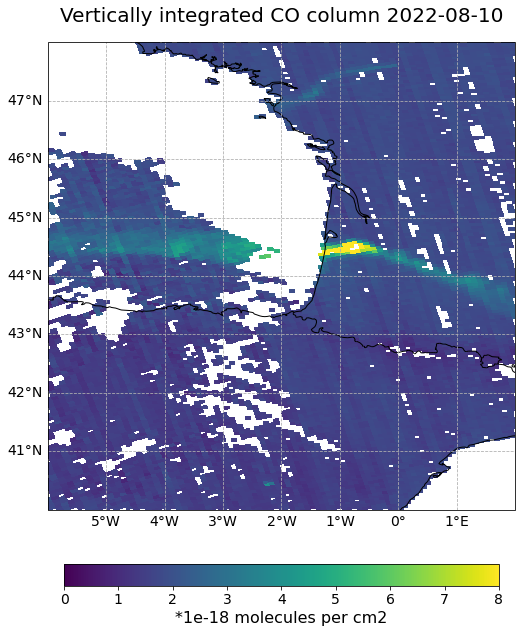

In [12]:
visualize_pcolormesh(data_array=s5p_co_converted*1e-18, 
                     longitude=s5p_co_converted.longitude, 
                     latitude=s5p_co_converted.latitude, 
                     projection=ccrs.PlateCarree(), 
                     color_scale='viridis', 
                     unit='*1e-18 molecules per cm2', 
                     long_name=longname + ' ' + str(s5p_co_converted.time.data)[0:10], 
                     vmin=0, 
                     vmax=8, 
                     lonmin=lonmin, 
                     lonmax=lonmax, 
                     latmin=latmin, 
                     latmax=latmax, 
                     set_global=False)


**Return to the case study:**
- [Monitoring fires with next-generation satellites from MTG and Metop-SG: Gironde, France Wildfires Case Study](./00_gironde_application_case.ipynb#gironde_fig4)

<hr>

### References
* Copernicus Sentinel data 2022

* Some code in this notebook was adapted from the following source:
    * origin: https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere/-/blob/master/20_data_exploration/241_Sentinel-5P_TROPOMI_CO_L2_load_browse.ipynb
    * copyright: 2022, EUMETSAT
    * license: MIT
    * retrieved: 2022-06-28 by Sabrina Szeto

<hr>

<p style="text-align:right;">This project is licensed under the <a href="../LICENSE">GPL-3.0 License</a> and is developed under a Copernicus contract.